# Predicting the Number of Refugees Accepted by Country

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import StratifiedKFold

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import cluster, metrics
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
refugee_df = pd.read_csv('/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/final_df_copy.csv')

# Introduction

The definition of a refugee, according to the 1967 Protocol Relating to the Status of Refugees, is an individual who due to the fear of being persecuted for reasons of race, religion, nationality, membership of a political group, is outside his/her national country. Most likely they cannot return back home or are afraid to do so. People who move in groups to avoid war or civil conflict are often considered as refugees. A refugee isn't an individual who is stateless or denied entrance into a country. Instead the term "internally displaced people" (IDP) is used to define those individuals who may have moved for the same reasons as refugees but have not crossed the border.

Recently Europe had a migration crisis, in which more than a million refugees crossed into Europe, causing a division in the European Union regarding the best way to deal with resettling people. According to the UNHCR, the top three nationalities of the refugees, between January 2015 and March 2016 were Syria, Afghan, and Iraq. In 2015 the demographic of refugees and migrants, were 58% men, 17% women, and 25% children. The number of deaths hit an all time high in April 2015, when five boats carrying 2000 migrants to Europe sank in the Mediterranean Sea, in which the death toll was estimated at 1,200 people.

The Syrian Conflict has been an ongoing issue in which 250,000 citizens have lost their lives over a war that started with an armed conflict. Similarly, there have been multiple civil wars and protests that have led citizens to find asylum in different countries. After reading into these conflicts, I decided to look into the recent trends in the acceptance of refugees. Previously, there have been issues with refugees being treated poorly, and lack of a safe community. By looking into a country's profile, including the population, murder rate by 1000, poverty, etc. I hope to be able to see the relation between these variables and the refugees in 2015. 

# Datasets

- Refugees 2010 & 2015: http://popstats.unhcr.org/en/persons_of_concern
- Continent: https://en.wikipedia.org/wiki/List_of_countries_by_system_of_government
- Murder Rate: http://www.nationmaster.com/country-info/stats/Crime/Murder-rate
- Children: http://www.nationmaster.com/country-info/stats/Education/Children-out-of-school%2C-primary-per-1000
- Government: https://en.wikipedia.org/wiki/List_of_countries_by_system_of_government
- GDP: http://databank.worldbank.org/data/download/GDP.pdf
- Immigrants: https://en.wikipedia.org/wiki/List_of_countries_by_immigrant_population
- Rain: http://www.nationmaster.com/country-info/stats/Geography/Average-precipitation-in-depth/Mm-per-year
- Density/Population/Area: http://www.worldatlas.com/aatlas/populations/ctypopls.htm
- Famine: http://www.cs.mcgill.ca/~rwest/link-suggestion/wpcd_2008-09_augmented/wp/l/List_of_famines.htm
- Civil War: https://en.wikipedia.org/wiki/List_of_civil_wars
- Poverty: http://www.indexmundi.com/g/r.aspx?v=69

In [3]:
refugee_df.columns

Index([u'Country', u'Key', u'Continent', u'Refugees_2010', u'Refugees_2015',
       u'Murder Rate', u'Children_out_of_school', u'Government',
       u'GDP($ in million)', u'Immigrants', u'Rain(ml)', u'Density(pop/mi)',
       u'Population', u'Area(mi)', u'Famine', u'Female', u'Male', u'Civil',
       u'Poverty'],
      dtype='object')

The dataset was created by web scrapping data from UNHCR, World Bank and multiple websites. The dataset originally contained information about Refugees in 2010, 2015, Countries, Continent, Murder Rate out of 1000, Children who dropped out of school which is out of 1000, and Government. I later decided to look into the Economic and Geographic aspect of the countries, by including GDP in million of US Dollars, Immigrants, Rainfall in ml, Population Density, Population, Area, Female population distribution, Male population distribution, recent Famine Strike (Binary value), and recent Civil War (Binary value). I believed these variables would be beneficial in showing the trends in the number of refugees, as it includes the geographic, economic, and political aspect of each country.

## Data Dictionary

In [4]:
#Finding the difference between the number of Refugees 2015 and Refugees 2010.
refugee_df['Difference'] = refugee_df['Refugees_2015'] - refugee_df['Refugees_2010']

In [5]:
refugee_df.columns

Index([u'Country', u'Key', u'Continent', u'Refugees_2010', u'Refugees_2015',
       u'Murder Rate', u'Children_out_of_school', u'Government',
       u'GDP($ in million)', u'Immigrants', u'Rain(ml)', u'Density(pop/mi)',
       u'Population', u'Area(mi)', u'Famine', u'Female', u'Male', u'Civil',
       u'Poverty', u'Difference'],
      dtype='object')

In [6]:
refugee_df.shape

#The data contains 20 variables for 162 countries

(162, 20)

In [7]:
data_dict = { 'Country' : [refugee_df['Country'].dtypes, 'Country of the World', len(refugee_df['Country'])],
               'Key' : [refugee_df['Key'].dtypes, 'Key used for Folium', len(refugee_df['Key'])],
               'Continent' : [refugee_df['Continent'].dtypes, 'Continent of the Country', len(refugee_df['Continent'])],
               'Refugees_2010' : [refugee_df['Refugees_2010'].dtypes, 'Refugees in 2010', len(refugee_df['Refugees_2010'])],
               'Refugees_2015' : [refugee_df['Refugees_2015'].dtypes, 'Refugees in 2015', len(refugee_df['Refugees_2015'])],
               'Murder Rate' : [refugee_df['Murder Rate'].dtypes, 'Murder Rate per 100,000', len(refugee_df['Murder Rate'])],
               'Children_out_of_school' : [refugee_df['Children_out_of_school'].dtypes, 'Number of children out of primary school/1000', len(refugee_df['Children_out_of_school'])],
               'Government' : [refugee_df['Government'].dtypes, 'Government of the Country', len(refugee_df['Government'])],
               'GDP($ in million)' : [refugee_df['GDP($ in million)'].dtypes, 'GDP in US$ millions', len(refugee_df['GDP($ in million)'])],
               'Immigrants' : [refugee_df['Immigrants'].dtypes, 'Number of Immigrant Population', len(refugee_df['Immigrants'])],
               'Rain(ml)' : [refugee_df['Rain(ml)'].dtypes, 'Rain in ml per year/1000', len(refugee_df['Rain(ml)'])],
               'Density(pop/mi)' : [refugee_df['Density(pop/mi)'].dtypes, 'Density based on population and miles', len(refugee_df['Density(pop/mi)'])],
               'Population' : [refugee_df['Population'].dtypes, 'Population for each country', len(refugee_df['Population'])],
               'Area(mi)' : [refugee_df['Area(mi)'].dtypes, 'Area in miles', len(refugee_df['Area(mi)'])],
               'Famine': [refugee_df['Famine'].dtypes, 'If there is a major famine in the past 15 years', len(refugee_df['Famine'])],
               'Female': [refugee_df['Female'].dtypes, 'Percentage of female population', len(refugee_df['Female'])],
               'Male' : [refugee_df['Male'].dtypes, 'Percentage of male population', len(refugee_df['Male'])],
               'Civil': [refugee_df['Civil'].dtypes, 'If there is a major civil war in the past 15 years', len(refugee_df['Civil'])],
               'Poverty' : [refugee_df['Poverty'].dtypes, 'Percentage of poverty', len(refugee_df['Poverty'])],
               'Difference':[refugee_df['Difference'].dtypes, 'Difference between 2010 and 2015', len(refugee_df['Difference'])]
            }

data_dict

{'Area(mi)': [dtype('float64'), 'Area in miles', 162],
 'Children_out_of_school': [dtype('float64'),
  'Number of children out of primary school/1000',
  162],
 'Civil': [dtype('float64'),
  'If there is a major civil war in the past 15 years',
  162],
 'Continent': [dtype('O'), 'Continent of the Country', 162],
 'Country': [dtype('O'), 'Country of the World', 162],
 'Density(pop/mi)': [dtype('float64'),
  'Density based on population and miles',
  162],
 'Difference': [dtype('float64'), 'Difference between 2010 and 2015', 162],
 'Famine': [dtype('float64'),
  'If there is a major famine in the past 15 years',
  162],
 'Female': [dtype('float64'), 'Percentage of female population', 162],
 'GDP($ in million)': [dtype('float64'), 'GDP in US$ millions', 162],
 'Government': [dtype('O'), 'Government of the Country', 162],
 'Immigrants': [dtype('float64'), 'Number of Immigrant Population', 162],
 'Key': [dtype('O'), 'Key used for Folium', 162],
 'Male': [dtype('float64'), 'Percentage of mal

In [8]:
data_df = pd.DataFrame(data_dict)

In [9]:
data_df = data_df.T
data_df.reset_index(inplace = True)
data_df.rename(columns={'index' : 'Variables', 0: 'data type', 1: 'Description', 2 : 'Length'}, inplace=True)
data_df #Data dictionary containing the variables, data type, and Description

,Variables,data type,Description,Length
0,Area(mi),float64,Area in miles,162
1,Children_out_of_school,float64,Number of children out of primary school/1000,162
2,Civil,float64,If there is a major civil war in the past 15 y...,162
3,Continent,object,Continent of the Country,162
4,Country,object,Country of the World,162
5,Density(pop/mi),float64,Density based on population and miles,162
6,Difference,float64,Difference between 2010 and 2015,162
7,Famine,float64,If there is a major famine in the past 15 years,162
8,Female,float64,Percentage of female population,162
9,GDP($ in million),float64,GDP in US$ millions,162


# Data cleaning/munging methods

The data cleaning process was the most difficult and time consuming as it took time to scrape and combine the individual lists into multiple dataframes. This step involved scrapping data from UNHCR, World Bank, and charts from Wikipedia. Each data frame had a different cleaning method, but most of the cleaning was modifying the type of the variables and removing extra characters from float types. Couple issues I had were dealing with the italicized and bold text when scrapping data, and the different spelling of the country's amongst the data frames. In terms of the country's spelling I decided to work off the JSON file since it would be needed to map the visualization. After creating a function to find the difference between two dataframe columns I was able to find the specific countries that needed to be changed. The final cleaning process involved merging the data frames in which I used left join to include all countries, even if they contained NULL values. This dataframe was later used in the folium map visualization, since any missing countries compared to the JSON would cause an error with the visualization. I later took a copy and deleted columns with all NULLs to be used for EDA and modeling. For the additional NULL values I took the mean of each column, except for the civil war and famine in which I inputted 0. The reason why I didn't drop the columns was to prevent any skewed data, create an accurate model, and prevent the loss of useful data, as some of the rows were only missing one or two columns. 

# EDA

Data Cleaning: https://github.com/nsivapra/DSI-SF-2-nsivapra/blob/master/Capstone/Code/EDA_Final.ipynb

In [10]:
refugee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 20 columns):
Country                   162 non-null object
Key                       162 non-null object
Continent                 162 non-null object
Refugees_2010             162 non-null float64
Refugees_2015             162 non-null float64
Murder Rate               162 non-null float64
Children_out_of_school    162 non-null float64
Government                161 non-null object
GDP($ in million)         162 non-null float64
Immigrants                162 non-null float64
Rain(ml)                  162 non-null float64
Density(pop/mi)           162 non-null float64
Population                162 non-null float64
Area(mi)                  162 non-null float64
Famine                    162 non-null float64
Female                    162 non-null float64
Male                      162 non-null float64
Civil                     162 non-null float64
Poverty                   162 non-null float64
Differ

In [11]:
refugee_df.head()

,Country,Key,Continent,Refugees_2010,Refugees_2015,Murder Rate,Children_out_of_school,Government,GDP($ in million),Immigrants,Rain(ml),Density(pop/mi),Population,Area(mi),Famine,Female,Male,Civil,Poverty,Difference
0,Afghanistan,AFG,Asia,6434.0,257553.0,3.400000,122.810,Republic,19199.0,105090.0,327.0,116.47,29117000.0,250001.05,1.0,49.3,50.7,0.0,36.0,251119.0
1,Angola,AGO,Africa,15155.0,15537.0,9.157481,25.420,Republic,102643.0,87436.0,1010.0,39.46,18993000.0,481353.36,0.0,50.4,49.6,0.0,40.5,382.0
2,Albania,ALB,Europe,76.0,79.0,4.500000,6.860,Republic,11456.0,57616.0,1485.0,287.85,3195000.0,11099.66,0.0,49.9,50.1,0.0,14.3,3.0
3,United Arab Emirates,ARE,Asia,538.0,658.0,0.920000,0.626,Absolute monarchy,370293.0,7826981.0,78.0,147.09,4707000.0,32000.13,0.0,29.9,70.1,0.0,19.5,120.0
4,Argentina,ARG,South America,3276.0,3142.0,5.500000,0.938,Republic,548055.0,1885678.0,591.0,37.93,40518951.0,1068301.76,0.0,51.1,48.9,0.0,30.0,-134.0


In [12]:
refugee_df.describe().T 
#Looking into the variable's mean, std, min, percentile, and max values.

,count,mean,std,min,25%,50%,75%,max
Refugees_2010,162.0,6.862340e+04,2.022584e+05,0.0000,5.837500e+02,6.725000e+03,6.562925e+04,1.900621e+06
Refugees_2015,162.0,1.040647e+05,2.786519e+05,0.0000,6.512500e+02,6.977500e+03,1.036350e+05,2.541308e+06
Murder Rate,162.0,9.210922e+00,1.230936e+01,0.0000,1.755000e+00,5.700000e+00,9.157481e+00,7.100000e+01
Children_out_of_school,162.0,1.468913e+01,2.358793e+01,0.0322,1.287500e+00,4.595000e+00,1.510569e+01,1.290900e+02
GDP($ in million),162.0,4.713589e+05,1.719697e+06,0.0000,1.391100e+04,5.620150e+04,3.604145e+05,1.794700e+07
Immigrants,162.0,1.445152e+06,4.162821e+06,2585.0000,9.970850e+04,2.964405e+05,1.215333e+06,4.662710e+07
Rain(ml),162.0,1.104327e+03,7.499603e+02,51.0000,5.432500e+02,1.027000e+03,1.588750e+03,3.142000e+03
Density(pop/mi),162.0,2.566349e+02,3.333259e+02,4.5800,5.863000e+01,1.764550e+02,3.064750e+02,2.957350e+03
Population,162.0,4.189564e+07,1.440606e+08,246000.0000,3.883750e+06,1.020650e+07,3.106350e+07,1.339190e+09
Area(mi),162.0,3.207754e+05,7.982779e+05,998.4600,2.267808e+04,8.706793e+04,2.834319e+05,6.592769e+06


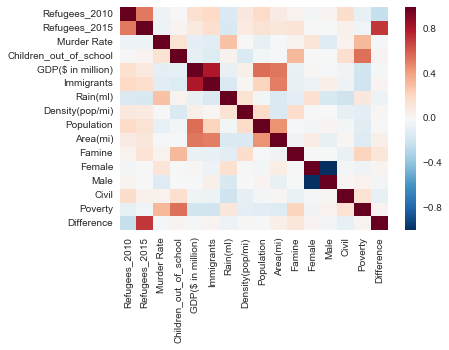

In [13]:
#Based on the heatmap we can see the relationship between the numeric data types. 
#The squares closer to dark red have a strong positive relationship, 
#while squares closer to dark blue have a strong negative relationship. 
heat = sns.heatmap(refugee_df.corr())
heat
fig = heat.get_figure()
fig.savefig("../Images/HeatMap.png")

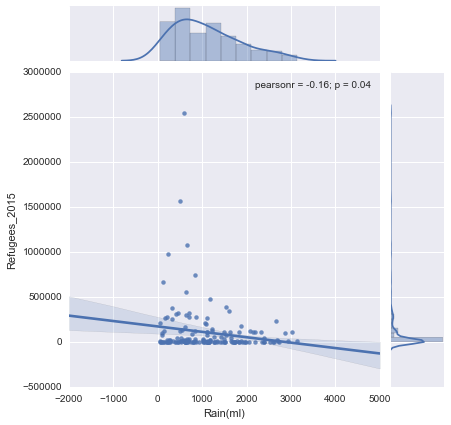

In [14]:
#The jointplot shows the relationship between Rain and the number of Refugees in 2015.
#The histogram is a helpful method to see the distribution of the values, mode, min,
#and max.
g = sns.jointplot("Rain(ml)", "Refugees_2015", data=refugee_df, kind="reg")
g.savefig("../Images/Rain-Ref.png")

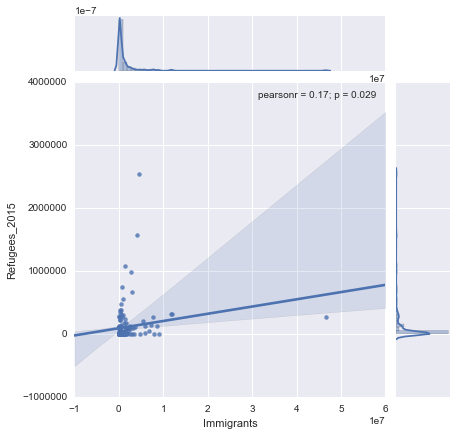

In [15]:
#This jointplot shows the relationship between the Immigrants and Refugees in 2015.
#Based on the pearson r value there is a slight positive correlation between these
#variables. The Histograms similarly show the values that most populated.
g = sns.jointplot("Immigrants", "Refugees_2015", data=refugee_df, kind="reg")
g.savefig("../Images/Imm-Ref.png")

In [16]:
refugee_df.columns

Index([u'Country', u'Key', u'Continent', u'Refugees_2010', u'Refugees_2015',
       u'Murder Rate', u'Children_out_of_school', u'Government',
       u'GDP($ in million)', u'Immigrants', u'Rain(ml)', u'Density(pop/mi)',
       u'Population', u'Area(mi)', u'Famine', u'Female', u'Male', u'Civil',
       u'Poverty', u'Difference'],
      dtype='object')

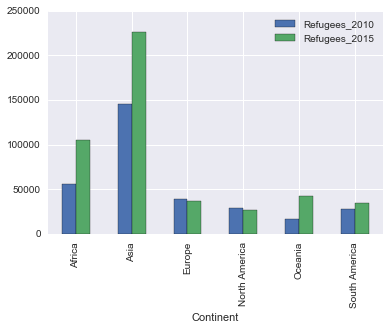

In [17]:
#The matplotlib shows the number of refugees in 2010, and 2015 grouped by the Continents.
#Asia took the most refugees in both 2010, and 2015. Oceania took the least number of refugees
#in 2010; however, North America took the least in 2015.

cont = refugee_df.groupby('Continent')[['Refugees_2010', 'Refugees_2015']].mean().plot(kind = 'bar')
cont
fig = plt.gcf()
fig.savefig('../Images/Continent.png')

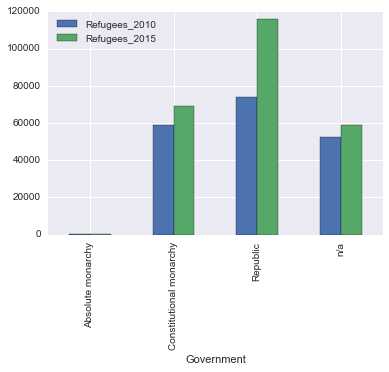

In [18]:
#This groupby shows the trends in number of refugees in 2010, and 2015 by government.
#Based on the plot we can see a sudden increase in acceptance frm Constitutional monarcy, 
#while there is a slight increase in Republic.

refugee_df.groupby('Government')[['Refugees_2010', 'Refugees_2015']].mean().plot(kind = 'bar')
fig = plt.gcf()
fig.savefig('../Images/Government.png')

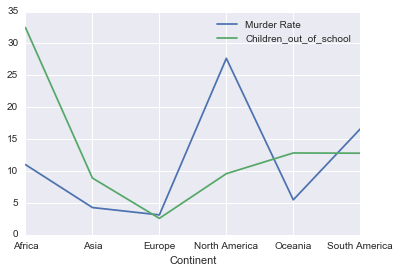

In [19]:
#Based on the line graph Africa has the most number of Children out of school, while North America has the most 
#murders. Overall Europe has the lowest value for both Murder Rate and Children out of school. 
refugee_df.groupby('Continent')[['Murder Rate', 'Children_out_of_school']].mean().plot(kind = 'line')
fig = plt.gcf()
fig.savefig('../Images/Line.png')

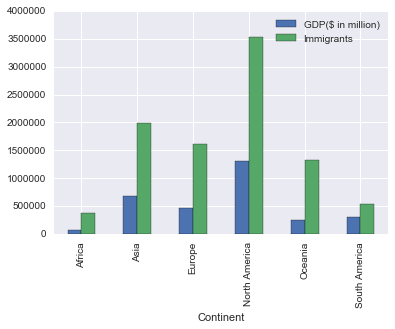

In [20]:
refugee_df.groupby('Continent')[['GDP($ in million)', 'Immigrants']].mean().plot(kind = 'bar')

fig = plt.gcf()
fig.savefig('../Images/GDP-Imm.png')
#This bar chart shows the GDP in million of US Dollars, and the number of Immigrants in 2015.
#North America has the most number of immigrants and highest GDP, while Africa has the least number of immigrants
#and the lowest GDP. In general the values are correlated postively as the GDP increases the number of immigrants
#increase.

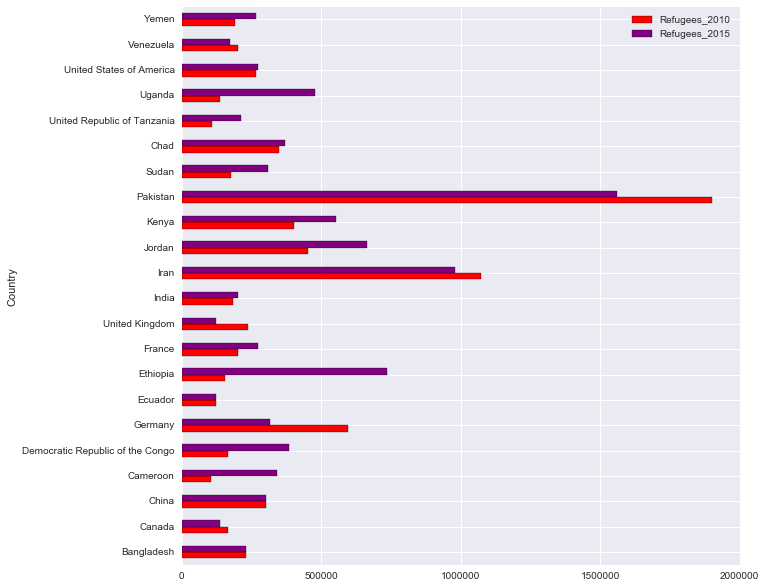

In [21]:
#This plot shows the countries who accepted more than 100000 refugees in 2010 and 2015. 
ref_2010 = refugee_df[(refugee_df.Refugees_2010 > 100000) & (refugee_df.Refugees_2015 > 100000)]
ref_2010.plot(kind='barh',x='Country',y=['Refugees_2010', 'Refugees_2015'],figsize=(10,10),color = ['red', 'purple'])
fig = plt.gcf()
fig.savefig('../Images/Country.png')

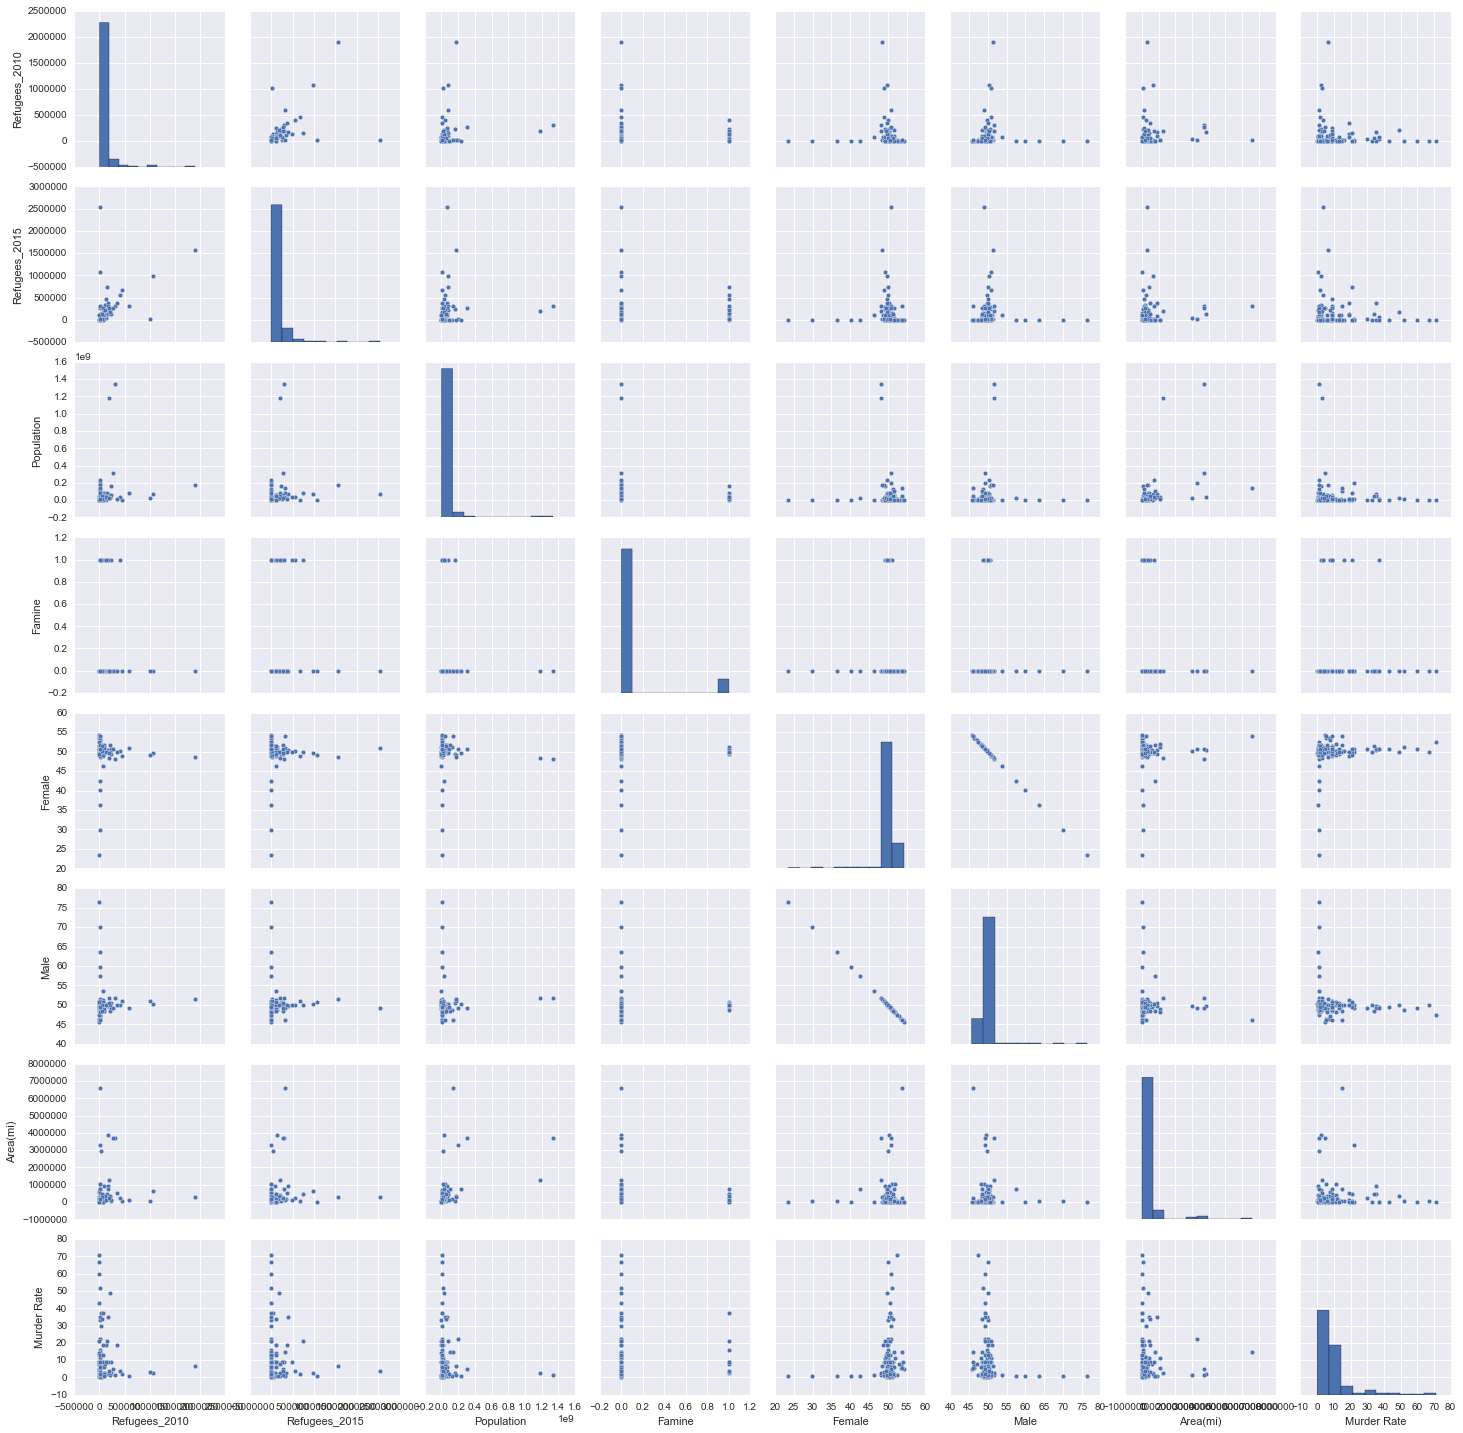

In [22]:
#The pairplot shows the relationship between the Refugees in 2010, 2015, Population, Famine, Female, Male, Area
#and Murder Rate

#These variables are chosen since they are the predictor variables in most of the models.
refugee_sub = refugee_df[['Refugees_2010', 'Refugees_2015', 'Population', 'Famine', 'Female', 'Male', 'Area(mi)', 'Murder Rate']]
sns.pairplot(refugee_sub)
fig = plt.gcf()
fig.savefig('../Images/Pairplot.png')

# Model Description

My initial models include a simple Linear and Logistic model trying to find the parameters that created the best model. The Linear Regression model used the number of refugees in 2010, Population of the country, recent famine, Female, male population, and number of immigrants to predict the number of refugees in 2015. I additionally used various cross validation methods, including RidgeCV, ElasticNetCV, and LassoCV to get the best R$^2$. However; the values were worse than the original Linear Model. I included a logistic model to see whether a country's continent can be predicted based on various variables. This information would be helpful in predicting how the location of a country can impact conflicts and immigration. I later created a target and predictor variable that would predict whether a country had a Civil War in the past 15 years based on the Number of Refugees in 2010, 2015, Murder Rate, children out of primary school, size of the country in miles, and whether the country had a recent famine. The second set of variables is similar to the first except I predicted Famine, and used Civil War instead of Famine as the predictor variable. These variables would later be used in the ROC and PR curve to see how the model predicts compared to the baseline accuracy.

After creating the simple regression models I decided to expand on the models by creating linear models with PCA, and Decision Tree models. The PCA model is helpful in creating an axis around each variable which decreases variation and improves the model's score. The Decision Tree model uses an algorithm model similar to a binary tree that traverses through each node trying to see the best variables that predict the target variable. Using the variables I used in the logistic model to predict the continent, I created a Decision Tree classification model. I also created a Decision Tree Regression model to predict the number of refugees in 2015 using the same variables as the linear model.

# Model Code

## Linear Regression

In [23]:
refugee_df.columns

Index([u'Country', u'Key', u'Continent', u'Refugees_2010', u'Refugees_2015',
       u'Murder Rate', u'Children_out_of_school', u'Government',
       u'GDP($ in million)', u'Immigrants', u'Rain(ml)', u'Density(pop/mi)',
       u'Population', u'Area(mi)', u'Famine', u'Female', u'Male', u'Civil',
       u'Poverty', u'Difference'],
      dtype='object')

In [24]:
#The Linear Regression model predicts the number of refugees in 2015, given the number of refugees in 2010,
#Population, Famine, Female, number of Immigrants, and Male population

value = refugee_df.filter(regex = 'Ref|Pop|Fam|Fem|Mal|Imm')
rem = refugee_df.filter(regex = '2015')
col = value.columns - rem.columns
X_linear = refugee_df[col]
ss = StandardScaler()
Xn = ss.fit_transform(X_linear)
y_linear = refugee_df['Refugees_2015'].values

lm_linear = LinearRegression()
model = lm_linear.fit(X_linear, y_linear)
scores = cross_val_score(lm_linear, X_linear, y_linear, cv=5) #CV to prevent overfitting.
print "R2", np.mean(scores)

R2 0.410719809899


/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [25]:
coefs = pd.DataFrame({'coef':lm_linear.coef_,
                      'variable':[col for col in X_linear]})
coefs.sort_values(by = 'coef', ascending = False)

,coef,variable
0,117846.244249,Famine
1,923.445066,Female
5,0.687917,Refugees_2010
2,0.004967,Immigrants
4,0.000068,Population
3,-923.445226,Male


The Correlation coefficient is a metric in measuring the how well the predictor variables correlate with the target variable. Looking into the predictor variables (Famine, Female, Refugees_2010, Immigrants, Population, and Male) we can see which variables affect the Number of Refugees in 2015 the most. Famine, and Female affect the number of refugees the most, while the rest of the variables don't affect the target variable much.

## Logistic Regression/Confusion Matrix

In [26]:
refugee_df.columns

Index([u'Country', u'Key', u'Continent', u'Refugees_2010', u'Refugees_2015',
       u'Murder Rate', u'Children_out_of_school', u'Government',
       u'GDP($ in million)', u'Immigrants', u'Rain(ml)', u'Density(pop/mi)',
       u'Population', u'Area(mi)', u'Famine', u'Female', u'Male', u'Civil',
       u'Poverty', u'Difference'],
      dtype='object')

In [27]:
#Logistic Regression looking into the Continent based on the number of Refugees in 2010, 2015, Murder Rate, 
#Children out of primary school, Area, Famine, Female, and Male population.

value = refugee_df.filter(regex = 'Ref|Rate|Child|Are|Fam|Fem|Mal|Continent')
rem = refugee_df.filter(regex = 'Cont')
col = value.columns - rem.columns
X_cont = refugee_df[col]
ss = StandardScaler()
Xn_cont = ss.fit_transform(X_cont)
y_cont = refugee_df['Continent'].values

lr_cont = LogisticRegression()
model = lr_cont.fit(Xn_cont, y_cont)
score = cross_val_score(lr_cont, Xn_cont, y_cont, cv = 5)
print "R2", np.mean(score)

R2 0.594395568589


/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [28]:
coefs = pd.DataFrame({'coef':lr_cont.coef_[0],
                      'variable':[col for col in X_cont]})
coefs.sort_values(by = 'coef', ascending = False)

,coef,variable
1,1.316630,Children_out_of_school
2,0.725119,Famine
3,0.101347,Female
5,-0.010621,Murder Rate
7,-0.073025,Refugees_2015
4,-0.101347,Male
0,-0.144146,Area(mi)
6,-0.152325,Refugees_2010


This dataframe looks into the correlation coefficient between the predictor and target variables. Based on the coefficient the variables children_out_of_school, Famine, and the Female affect the Continent in a positive way, while Murder Rate, Male, Refugees_2015, Area(mi), and Refugees_2010 affect the Continent in a negative way.

In [29]:
#Setting the variables for the ROC curve by looking into the Civil War binary value, based on the number of Refugees 
#in 2010, 2015, Murder Rate, Children out of primary school, area of a country, and recent famine in the past 15 years.

value = refugee_df.filter(regex = 'Ref|Rate|Child|Are|Fam|Civ')
rem = refugee_df.filter(regex = 'Civ')
col = value.columns - rem.columns
X_civ = refugee_df[col]
ss = StandardScaler()
Xn_civ = ss.fit_transform(X_civ)
y_civ = refugee_df['Civil'].values

lm_civ = LogisticRegression()
X_train_civ, X_test_civ, y_train_civ, y_test_civ = train_test_split(Xn_civ, y_civ, test_size=0.4)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [30]:
from sklearn.metrics import classification_report

lm_civ.fit(X_train_civ, y_train_civ)
y_pred_civ = lm_civ.predict(X_test_civ)
cls_rep = classification_report(y_test_civ, y_pred_civ)
print cls_rep 

             precision    recall  f1-score   support

        0.0       0.92      1.00      0.96        60
        1.0       0.00      0.00      0.00         5

avg / total       0.85      0.92      0.89        65



//anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The confusion matrix above shows the precision, recall, and f1-score for predicting the civil war. The precision is a score that shows if the classifier predicts yes, how often is it correct. The recall score measures the true positive rate of the target variable. The f1-score is the score between the precision and recall. The scores for all three metrics are considered strong, hence we can say the classifier is good.

In [31]:
#Setting the variables for the ROC curve by looking into the countrys with a famine in the past 15 years based on the 
#number of refugees in 2010, 2015, Murder Rate, Primary school children out of school, Area, and recent Civil War.

value = refugee_df.filter(regex = 'Ref|Rate|Child|Are|Fam|Civ')
rem = refugee_df.filter(regex = 'Fam')
col = value.columns - rem.columns
X_fam = refugee_df[col]
ss = StandardScaler()
Xn_fam = ss.fit_transform(X_fam)
y_fam = refugee_df['Famine'].values

lm_fam = LogisticRegression()
X_train_fam, X_test_fam, y_train_fam, y_test_fam = train_test_split(Xn_fam, y_fam, test_size=0.4)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [32]:
from sklearn.metrics import classification_report

lm_fam.fit(X_train_fam, y_train_fam)
y_pred_fam = lm_fam.predict(X_test_fam)
cls_rep = classification_report(y_test_fam, y_pred_fam)
print cls_rep 

             precision    recall  f1-score   support

        0.0       0.90      0.97      0.93        59
        1.0       0.00      0.00      0.00         6

avg / total       0.82      0.88      0.85        65



## ROC Curve

In [33]:
#Function to plot the ROC curve.
from sklearn.metrics import roc_curve, roc_auc_score, auc

def plot_roc(mod, X, y, varname):
    mod.fit(X, y)
    y_pp = mod.predict_proba(X)[:, 1]
    fpr_, tpr_, _ = roc_curve(y, y_pp)
    auc_ = auc(fpr_, tpr_)
    acc_ = np.abs(0.5 - np.mean(y)) + 0.5
    
    fig, axr = plt.subplots(figsize=(8,7))

    axr.plot(fpr_, tpr_, label='ROC (area = %0.2f)' % auc_,
             color='darkred', linewidth=4,
             alpha=0.7)
    axr.plot([0, 1], [0, 1], color='grey', ls='dashed',
             alpha=0.9, linewidth=4, label='baseline accuracy = %0.2f' % acc_)

    axr.set_xlim([-0.05, 1.05])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('false positive rate', fontsize=16)
    axr.set_ylabel('true positive rate', fontsize=16)
    axr.set_title(varname+' vs. not ROC curve\n', fontsize=20)

    axr.legend(loc="lower right", fontsize=12)

    plt.show()
    fig.savefig("../Images/"+varname+'.png')

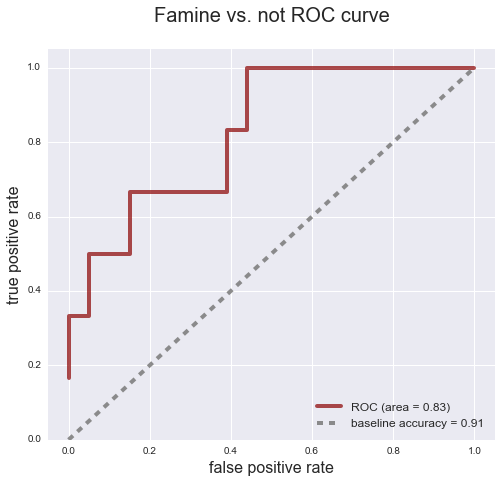

In [34]:
plot_roc(lm_fam, X_test_fam, y_test_fam, 'Famine')

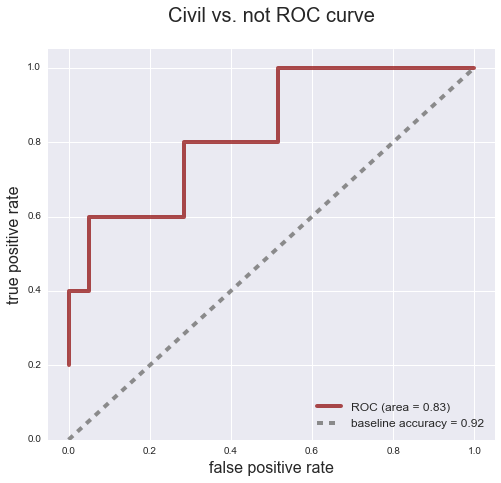

In [35]:
plot_roc(lm_civ, X_test_civ, y_test_civ, 'Civil')

## Precision Recall Curve

In [36]:
#Function for the Precision Recall Curve
from sklearn.metrics import (precision_recall_curve, average_precision_score, f1_score)

def plot_prauc(mod, X, y, varname):
    mod.fit(X, y)
    y_pp = mod.predict_proba(X)[:, 1]
    precision, recall, _ = precision_recall_curve(y, y_pp)
    avg_precision = average_precision_score(y, y_pp)
    
    fig, axr = plt.subplots(figsize=(8,7))

    axr.plot(recall, precision, label='PRAUC (area = %0.2f)' % avg_precision,
             color='steelblue', linewidth=4,
             alpha=0.7)

    axr.set_xlim([-0.05, 1.05])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('recall', fontsize=16)
    axr.set_ylabel('precision', fontsize=16)
    axr.set_title(varname+' vs. not PRAUC curve\n', fontsize=20)

    axr.legend(loc="upper right", fontsize=12)

    plt.show()
    fig.savefig("../Images/"+varname+'.png')

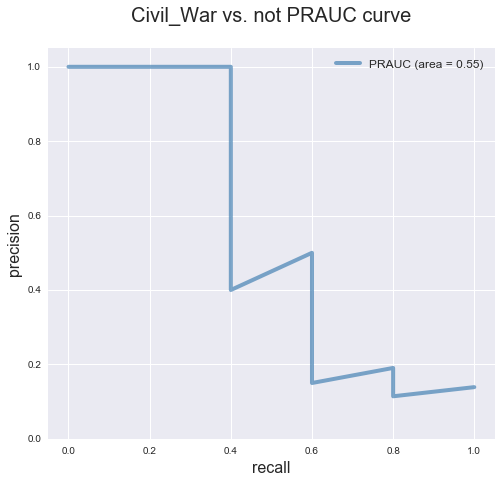

In [37]:
plot_prauc(lm_civ, X_test_civ, y_test_civ, 'Civil_War')

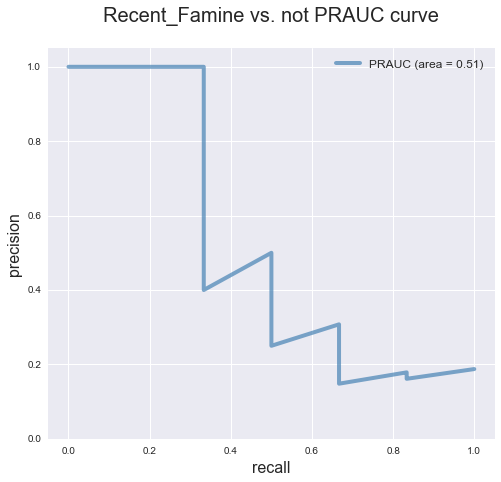

In [38]:
plot_prauc(lm_fam, X_test_fam, y_test_fam, 'Recent_Famine')

## PCA

In [39]:
refugee_df.columns

Index([u'Country', u'Key', u'Continent', u'Refugees_2010', u'Refugees_2015',
       u'Murder Rate', u'Children_out_of_school', u'Government',
       u'GDP($ in million)', u'Immigrants', u'Rain(ml)', u'Density(pop/mi)',
       u'Population', u'Area(mi)', u'Famine', u'Female', u'Male', u'Civil',
       u'Poverty', u'Difference'],
      dtype='object')

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(X_linear.values)

PCA(copy=True, n_components=6, whiten=False)

In [41]:
pcs = pca.transform(X_linear)
pca_linreg = LinearRegression()
pca_scores = cross_val_score(pca_linreg, pcs[:,0:10], y_linear, cv=5)
print np.mean(pca_scores)

0.410719809902


In [42]:
pd.DataFrame(pcs, columns=['PC1','PC2','PC3','PC4','PC5', 'PC6']).head(5)

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.278696e+07,-1.258861e+06,48616.021744,-1.020097,0.910680,1.692829e-09
1,-2.291086e+07,-1.211773e+06,37508.090452,0.532416,-0.090412,1.820573e-09
2,-3.870873e+07,-1.140797e+06,48843.278988,-0.189817,-0.089502,3.613938e-09
3,-3.714715e+07,6.618506e+06,110965.860966,-28.056459,-0.041184,8.142993e-09
4,-1.373868e+06,4.487740e+05,68569.471646,1.625634,-0.078616,2.309528e-10


As previously mentioned a PCA, is a dimensionality reducing algorithm that transforms the coordinate system so the axes are focused among the predictor variables. In this case the predictor variables are the same ones that are used in the linear regression. The scores in the dataframe show how each country correlated with the PCAs.

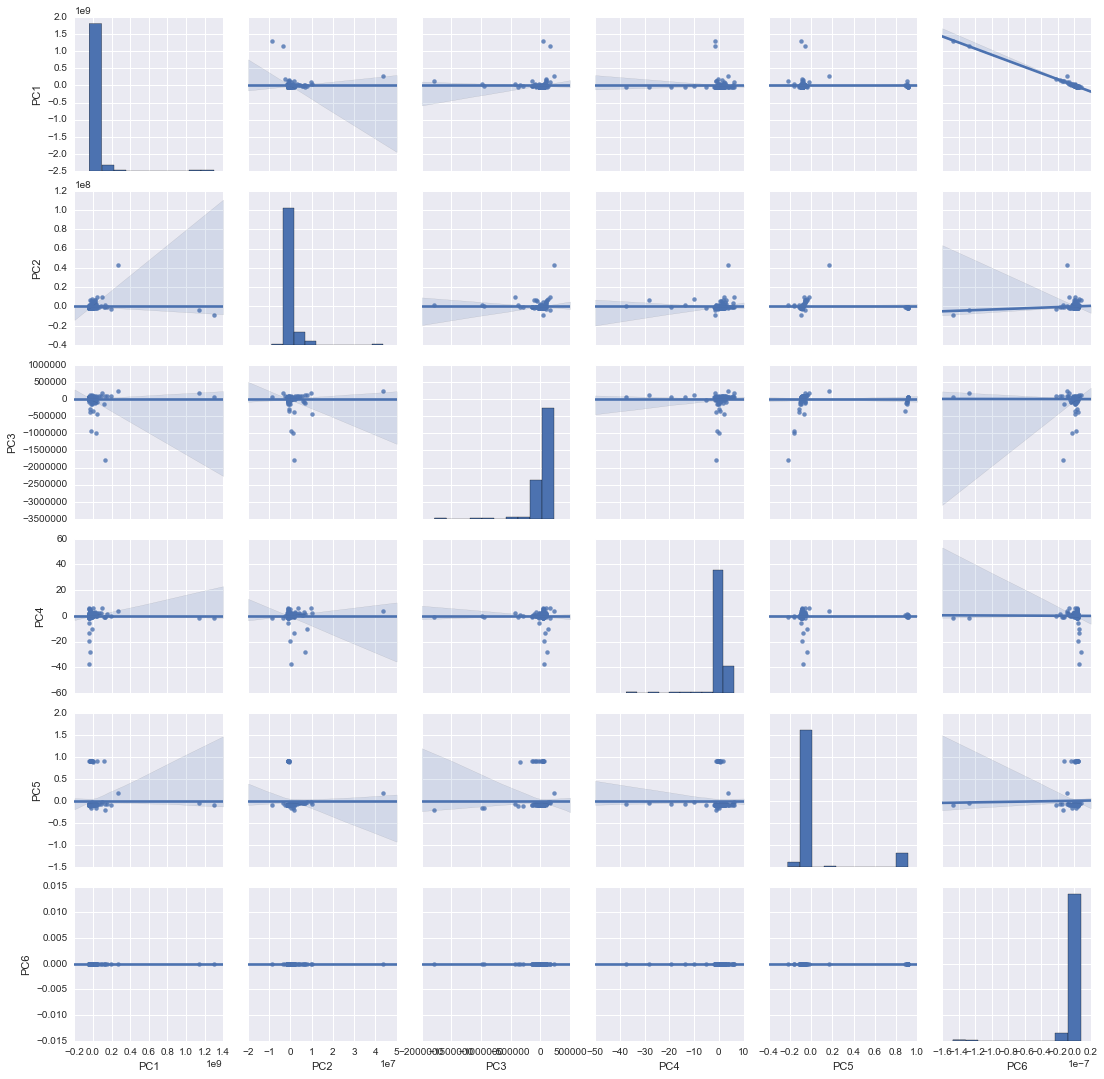

In [43]:
#Pairplot of the pcas
pca_graph = sns.pairplot(pd.DataFrame(pcs, columns=['PC1','PC2','PC3','PC4','PC5', 'PC6']), kind='reg')
pca_graph
pca_graph.savefig("../Images/pca_image.png")

# Decision Tree Classifier

In [44]:
refugee_df.columns

Index([u'Country', u'Key', u'Continent', u'Refugees_2010', u'Refugees_2015',
       u'Murder Rate', u'Children_out_of_school', u'Government',
       u'GDP($ in million)', u'Immigrants', u'Rain(ml)', u'Density(pop/mi)',
       u'Population', u'Area(mi)', u'Famine', u'Female', u'Male', u'Civil',
       u'Poverty', u'Difference'],
      dtype='object')

In [45]:
value = refugee_df.filter(regex = 'Ref|Rate|Child|Are|Fam|Continent')
rem = refugee_df.filter(regex = 'Cont')
col = value.columns - rem.columns
X_dec_cont = refugee_df[col]
ss = StandardScaler()
Xn_dec_cont = ss.fit_transform(X_dec_cont)
y_dec_cont = refugee_df['Continent'].values

X_train_dec, X_test_dec, y_train_dec, y_test_dec = train_test_split(Xn_dec_cont, y_dec_cont, test_size=0.3)

## Define your DecisionTreeClassifier
dctc = DecisionTreeClassifier(criterion='entropy')

## Search parameters
dtc_params = {
    'max_depth':[1,2,3,4],
    'max_features':[None,'log2','sqrt','auto', 2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

## Gridsearch    
dtc_gs_cont = GridSearchCV(dctc, dtc_params, n_jobs=-1, cv=5, verbose=1)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()


In [46]:
dtc_gs_cont.fit(X_train_dec, y_train_dec)

Fitting 5 folds for each of 352 candidates, totalling 1760 fits


[Parallel(n_jobs=-1)]: Done 628 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1760 out of 1760 | elapsed:    4.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'log2', 'sqrt', 'auto', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50], 'max_depth': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [47]:
## Print best estimator, best parameters, and best score
dtc_best_estimator = dtc_gs_cont.best_estimator_
print "best estimator", dtc_best_estimator

print "\n==========\n"
dct_best_param = dtc_gs_cont.best_params_
print "best parameters",  dct_best_param 

print "\n==========\n"
print "best score", dtc_gs_cont.best_score_

best estimator DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=3, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


best parameters {'max_features': 3, 'min_samples_split': 4, 'max_depth': 4}


best score 0.513274336283


In [48]:
dtc_best = dtc_gs_cont.best_estimator_
fi = pd.DataFrame({
        'feature':X_dec_cont.columns,
        'importance':dtc_best.feature_importances_
    })

fi.sort_values('importance', ascending=False, inplace=True)
fi

,feature,importance
3,Murder Rate,0.421547
1,Children_out_of_school,0.255148
0,Area(mi),0.216810
5,Refugees_2015,0.066486
4,Refugees_2010,0.040009
2,Famine,0.000000


Feature importance is an attribute that is used to tell which feature is more important. It ranges from 0 to 1, in which 1 is the most importance and 0 is the least. Another way of looking into the feature importance is how much that variable was used to make decisions. In this case, children, area, refugees in 2015, murder rate and Refugees_2010 affected the decision in the tree.

# Decision Tree Regression

In [49]:
from sklearn.tree import DecisionTreeRegressor

value = refugee_df.filter(regex = 'Ref|Dens|Pop|Fam|Fem|Mal')
rem = refugee_df.filter(regex = '2015')
col = value.columns - rem.columns
X_dec_ref = refugee_df[col]
ss = StandardScaler()
Xn_dec_ref = ss.fit_transform(X_dec_ref)
y_dec_ref = refugee_df['Refugees_2015'].values

X_train_ref, X_test_ref, y_train_ref, y_test_ref = train_test_split(Xn_dec_ref, y_dec_ref, test_size=0.3)

## Define your DecisionTreeClassifier
dctc_ref = DecisionTreeRegressor()

## Search parameters
dtc_params = {
    'max_depth':[1,2,3,4],
    'max_features':[None,'log2','sqrt','auto', 2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

## Gridsearch    
dtc_gs_ref = GridSearchCV(dctc_ref, dtc_params, n_jobs=-1, cv=5, verbose=1)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [50]:
dtc_gs_ref.fit(X_train_ref, y_train_ref)

Fitting 5 folds for each of 352 candidates, totalling 1760 fits


[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1760 out of 1760 | elapsed:    4.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'log2', 'sqrt', 'auto', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50], 'max_depth': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [51]:
dtc_best_estimator = dtc_gs_ref.best_estimator_
print "best estimator", dtc_best_estimator

print "\n==========\n"
dct_best_param = dtc_gs_ref.best_params_
print "best parameters",  dct_best_param 

print "\n==========\n"
print "best score", dtc_gs_ref.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': None, 'min_samples_split': 20, 'max_depth': 4}


best score 0.435685748831


In [52]:
dtc_best = dtc_gs_ref.best_estimator_
fi = pd.DataFrame({
        'feature':X_dec_ref.columns,
        'importance':dtc_best.feature_importances_
    })

fi.sort_values('importance', ascending=False, inplace=True)
fi

,feature,importance
5,Refugees_2010,0.872396
0,Density(pop/mi),0.127604
1,Famine,0.000000
2,Female,0.000000
3,Male,0.000000
4,Population,0.000000


Refugees in 2010, and Density made an impact on the decision to predict the number of Refugees. Famine, Female, Population and Male population made no impact on the decision tree.

# Description of results.

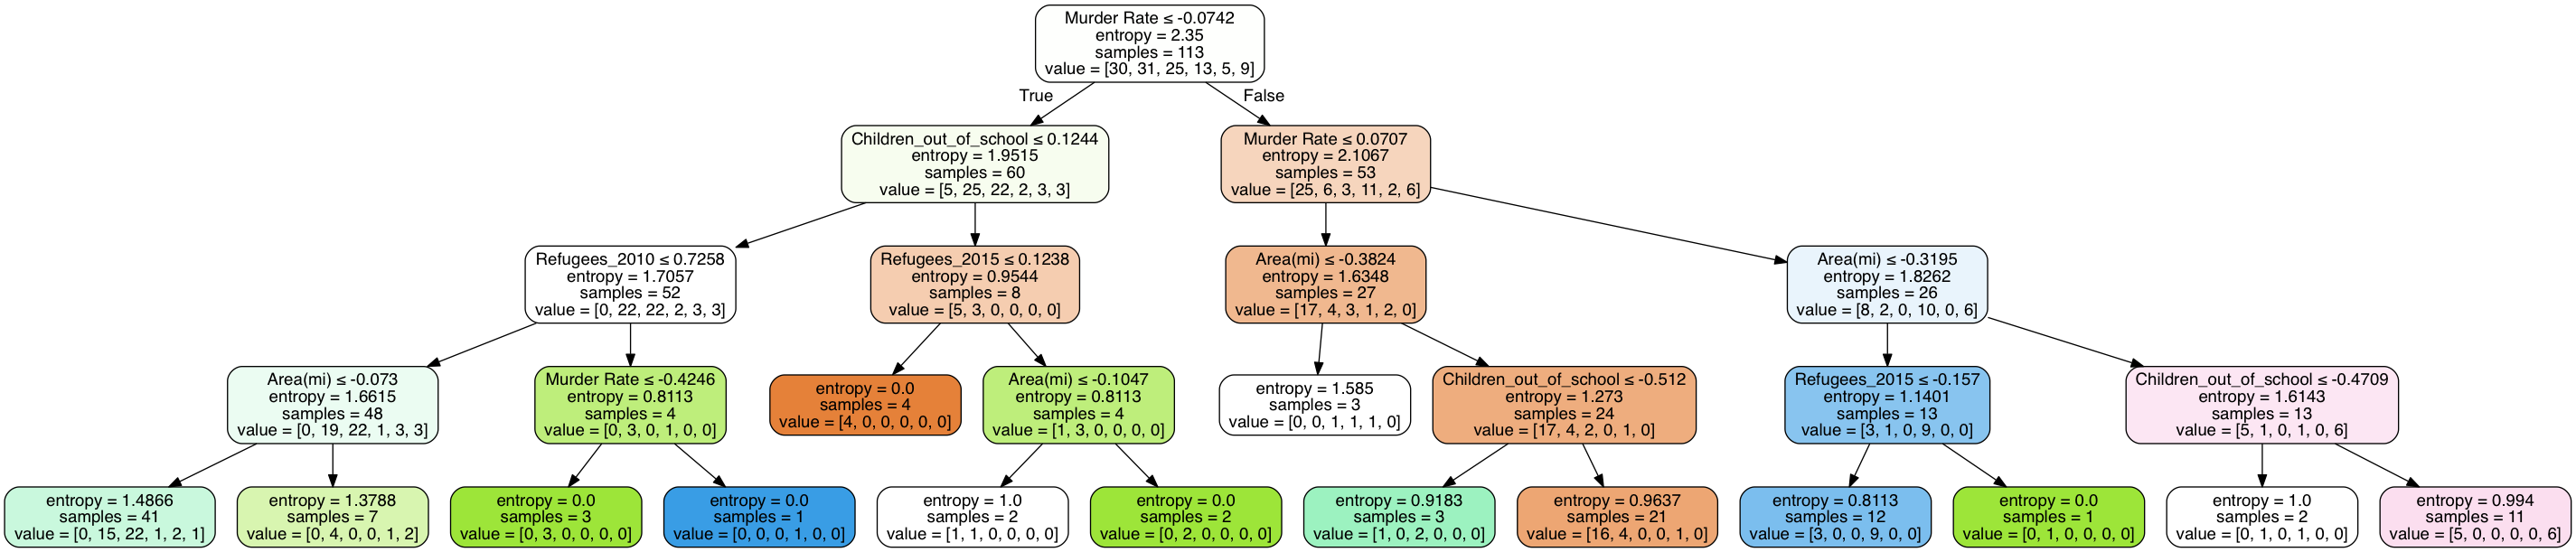

In [53]:
dot_data = StringIO()

## Define decision tree with best parameters, you can also use the best estimators
dctc_best = dtc_gs_cont.best_estimator_

## Graph
export_graphviz(dctc_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_dec_cont.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

#The Decision Tree contains the condition that is used to split the node
#If true go left, else right
#samples is the number of observations in that node before splitting
#entropy is the impurity at each node.
#if it was randomly labeled according to the distribution of labels in the subset
#value is the count of each class at that node.

In [54]:
graph.write_png("../Images/decision_cont.png")

True

The cells, each contain the necessary information to decide whether the path is helpful in predicting the target variable. Based on the importance and entropy (impurity) we can say Murder Rate, Refugees_2015 and Children_out_of_school were the factors that provided the lowest entropy. Entropy is a variable that is used to calculate information gain. Another path to a low entropy looks into the Murder Rate, Area, and Children out of school.

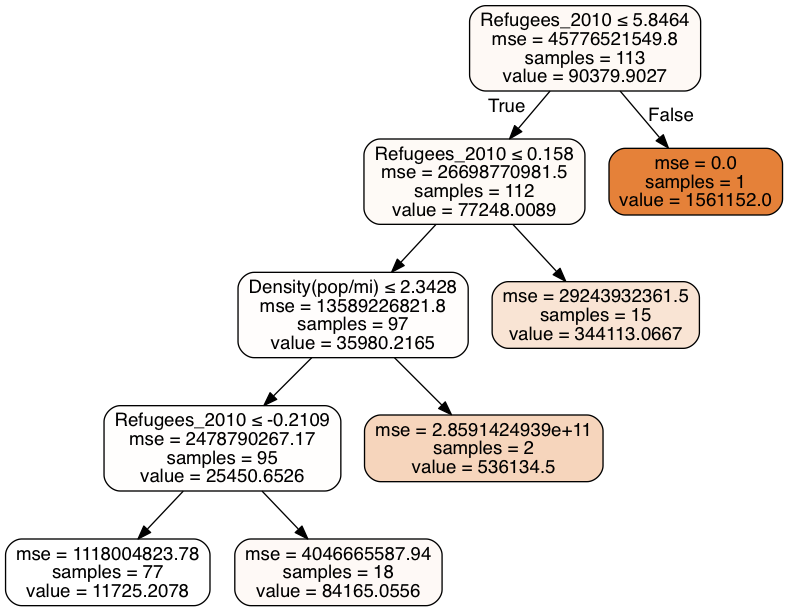

In [55]:
dot_data = StringIO()

## Define decision tree with best parameters, you can also use the best estimators
dctc_best = dtc_gs_ref.best_estimator_

## Graph
export_graphviz(dctc_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_dec_ref.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [56]:
graph.write_png("../Images/decision_ref.png")

True

Similar to the classification tree above, we can use, the importance values, and expected value to determine the best path in predicting the number of refugees. Based on the tree Refugees_2010 was the sole variable that had the highest value, while the second best path contains Refugees_2010 and Density.

In [57]:
final = pd.read_csv('../Data/final_copy.csv')
final['Refugees_2015'].fillna(0, inplace = True)
final['Refugees_2010'].fillna(0, inplace = True)
final['Difference'] = final['Refugees_2015'] - final['Refugees_2010']

In [58]:
#Note: The folium visualization doesn't show up on github.

import folium
import pandas as pd

world_geo = r'/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/data.json'
map_2010 = folium.Map(location=[48, -102], zoom_start=1.7)
map_2010.choropleth(geo_path=world_geo, data=final,
             columns=['Key', 'Refugees_2010'],
             threshold_scale=[0, 5000, 100000, 700000, 1000000, 3000000],
             key_on='feature.id',
             fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.5,
             legend_name='Unemployment Rate (%)', reset = True)
map_2010

The map visualization above is created using folium, a python map visualization library. The package takes in a JSON file, which includes the country name, key, and coordinates for each country. By passing in the refugee data frame which contains the information regarding the Country, Key, and the number of refugees in 2010 and 2015 I was able to create a map visualization portraying the countries with the largest number of refugees. There are multiple options for setting the color scale for the gradient, I decided to look into 'YlOrRd' which colors the countries with the least number of refugees yellow, and the most number with red. This same visualization could be accomplished using Tableau which allows for interaction.

In [59]:
map_2010.create_map(path='map_2010.html')

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: Map.create_map is deprecated. Use Map.save instead
  if __name__ == '__main__':


In [60]:
import folium
import pandas as pd

world_geo = r'/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/data.json'
map_2015 = folium.Map(location=[48, -102], zoom_start=1.7)
map_2015.choropleth(geo_path=world_geo, data=final,
             columns=['Key', 'Refugees_2015'],
             threshold_scale=[0, 5000, 100000, 700000, 1000000, 3000000],
             key_on='feature.id', 
             fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.5,
             legend_name='Unemployment Rate (%)', reset = True)
map_2015

In [61]:
map_2015.create_map(path='map_2015.html')

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: Map.create_map is deprecated. Use Map.save instead
  if __name__ == '__main__':


By looking into the folium visualization for the differences in refugees we can see that Turkey had the highest increase in their refugees from 2010. Some countries, including Canada and Syria have decreased the number of accepted refugees due to recent conflicts and political protest.

In [62]:
import folium
import pandas as pd

world_geo = r'/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/data.json'
map_diff = folium.Map(location=[48, -102], zoom_start=1.7)
map_diff.choropleth(geo_path=world_geo, data=final,
             columns=['Key', 'Difference'],
             threshold_scale=[-1000000, 5, 100000, 700000, 1000000, 3000000],
             key_on='feature.id', 
             fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.5,
             legend_name='Unemployment Rate (%)', reset = True)
map_diff

In [63]:
map_diff.create_map(path='map_diff.html')

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: Map.create_map is deprecated. Use Map.save instead
  if __name__ == '__main__':


# Conclusion

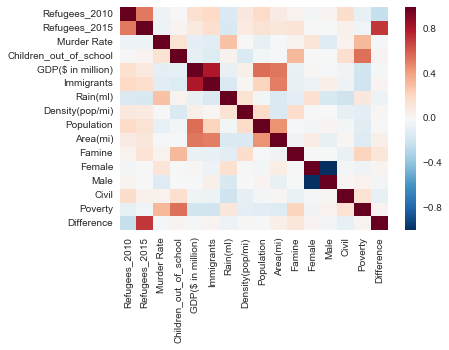

In [64]:
heat = sns.heatmap(refugee_df.corr())
heat

In [65]:
fig = heat.get_figure()
fig.savefig("../Images/HeatMapDiff.png")

The linear regression R$^2$ shows there is a moderate amount of variance between the predictor variables and the baseline model. I initially tried modeling with all the variables, but realized by dropping Civil War and Children out of School the R$^2$ improved by 0.05. I tried improving the R$^2$ by using regularization methods, including RidgeCV, LassoCV, and ElasticNetCV. However; these methods didn't improve the models and ended up having a worse score. Looking at the logistic regression R$^2$, we can say the predictor variables in the model were extremely helpful in predicting the Continent.

Based on the country's profile we can say there is an impact on the number of refugees who will find asylum in the country. If there a high number of refugees in 2010, GDP, and number of immigrants there is a higher chance of refugees in 2015. If there is a high number of Rainfall, and Murder Rate there is a chance of a descent in the number of refugees. By reducing racism, and providing a safer environment in other countries, there is a chance more refugees would seek to find asylum.